In [4]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean

import keyword

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

# LN1

## Loop

- ** 제곱
- range(a,b) : a에서 b-1 까지 정수 가져오기
- a%b : a를 b로 나눈 나머지 가져오기
- ==a: a와 같은것 만 가져오기

## 계산들

- 절댓값: abs() / np.abs()
- 루트: sqrt() / np.sqrt()



In [2]:
x=[1,2,3]

for i in x:
    y=i**2
    print(y)

1
4
9


In [3]:
for i in range(1,101):
    if i%2==0:
        print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100


In [6]:
# 절댓값
abs(-3)

3

In [7]:
np.abs(-100)

100

In [8]:
# 루트 제곱근
sqrt(4)

2.0

In [9]:
np.sqrt(100)

10.0

## 그래프들

> 히스토그램 : sns.histplot(x)

> box plot: sns.boxplot(x)
- box plot에 나타난 통계량 = five-number summary: 최소값, 1사분위수, 2사분위수,3사분위수, 최대값

<AxesSubplot:ylabel='Count'>

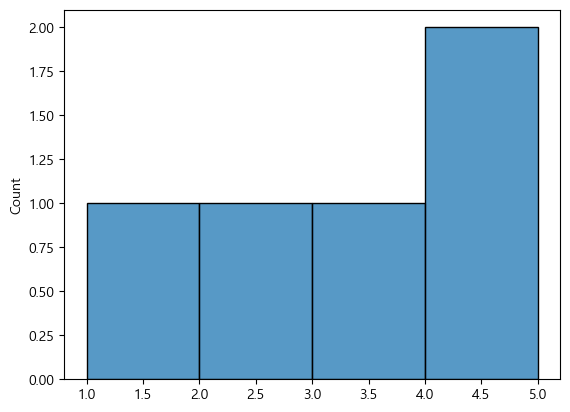

In [11]:
#히스토그램
x=[1,2,3,4,5]
sns.histplot(x)

<AxesSubplot:>

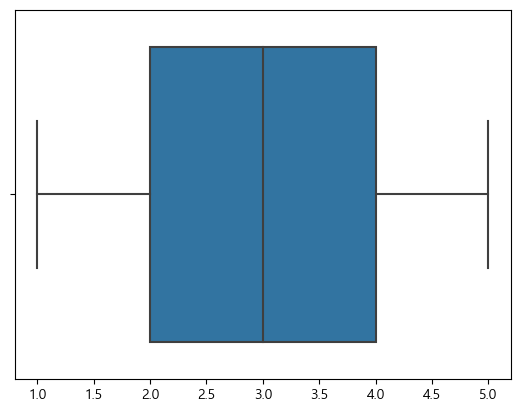

In [12]:
#box plot
sns.boxplot(x)

# 파일 불러오기

#### 엑셀파일
- data1=pd.read_excel('c:/temp/auto.xlsx')
- data1

#### csv파일
- data1=pd.read_ㅊㄴㅍ('c:/temp/auto.csv')
- data1

# 기술통계 Data description

- data1.head() : 앞 쪽 몇 개만
- data2.tail() : 뒤 쪽 몇 개만
- * 첫번째 observation은 0부터 시작한다

#### 통계량

- 평균
- data1['name'].mean()
- 
- 표준편차
- data1['name'].sㅅㅇ()
- 
- skewness
- data1['name'].skew()
- 왜도 / 치우친 정도 / 양0음 / 양수이면 오른쪽으로 꼬리가 긴 분포 / 최<중<평 / 0 이면 양쪽 대칭 ex. 정규분포
- 
- kurtosis
- data1['name'].kurtosis()
- 첨도/ 뾰족한 정도 / 양30음 / 3에 가까우면 산포도가 정규분포에 가깝다 / 양수 쪽으로 클수록 뾰족하다 / 뾰족할 수록 꼬리가 두껍다 / 완말할 수록 꼬리가 얇다
-
- correlation coefficient 상관계수 
- - data1[['name','name2']].corr()
- 0보다 큰 값 : 두 변수 같은 방향으로 움직인다. = 정비례 관계

In [13]:
data2=pd.read_csv('c:/temp/barium.csv')
data2

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462010,9578.3760,0,0,0,0,0,0,100.1,7830000128,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.4800,0,0,0,0,0,0,100.9,8819999744,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357500,9719.9004,0,0,0,0,0,0,101.1,8449999872,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421510,12920.9500,0,0,0,0,0,0,102.5,9240000512,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.4463,0,0,0,0,0,0,104.1,9150000128,...,0,0,1,0,0,0,0,0,0,1.170927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,589.422000,31686.8590,0,0,0,0,0,0,154.8,9420000256,...,0,0,0,0,1,0,0,0,0,1.860146
127,529.733520,16370.3400,0,0,0,0,0,0,155.3,8789999616,...,0,0,0,0,0,1,0,0,0,3.235935
128,968.037480,15653.9600,0,0,0,0,0,0,156.7,8990000128,...,0,0,0,0,0,0,1,0,0,6.183978
129,794.060000,45716.6090,0,0,0,0,0,0,157.5,8920000512,...,0,0,0,0,0,0,0,1,0,1.736918


In [14]:
print(data2)

          chnimp     bchlimp  befile6  affile6  afdec6  befile12  affile12  \
0     220.462010   9578.3760        0        0       0         0         0   
1      94.797997  11219.4800        0        0       0         0         0   
2     219.357500   9719.9004        0        0       0         0         0   
3     317.421510  12920.9500        0        0       0         0         0   
4     114.639000   9790.4463        0        0       0         0         0   
..           ...         ...      ...      ...     ...       ...       ...   
126   589.422000  31686.8590        0        0       0         0         0   
127   529.733520  16370.3400        0        0       0         0         0   
128   968.037480  15653.9600        0        0       0         0         0   
129   794.060000  45716.6090        0        0       0         0         0   
130  1087.806000  29580.5000        0        0       0         0         0   

     afdec12  chempi         gas  ...  apr  may  jun  jul  aug 

In [15]:
data2['chnimp']

0       220.462010
1        94.797997
2       219.357500
3       317.421510
4       114.639000
          ...     
126     589.422000
127     529.733520
128     968.037480
129     794.060000
130    1087.806000
Name: chnimp, Length: 131, dtype: float64

In [16]:
data2[['bchlimp']]

,bchlimp
0,9578.3760
1,11219.4800
2,9719.9004
3,12920.9500
4,9790.4463
...,...
126,31686.8590
127,16370.3400
128,15653.9600
129,45716.6090


In [17]:
data2['chnimp'].mean()

589.236995

In [18]:
data2['chnimp'].std()

349.54155187578453

## numpy 활용해서 직접 값 입력하기

- cashflow=pd.Series(index=[0,1,2,3,4,5], name='Cashflow', data=[-107,5,5,5,5,105])
- print(cashflow)

## IRR Internal Rate of Return 내부수익률 계산

- cashflow의 순현재가치(npv, net present value)를 0으로 만드는 할인율
- 어떤 투자의 IRR이 높을수록 투자 선택!
- IRR이 이자비용보다 높다면 투자 선택!
- IRR이 상대적으로 낮다면 투자 회피!
- npf.irr(cashflow)

In [20]:
# numpy 이용해서 직접 값 입력
cashflow=pd.Series(index=[0,1,2,3,4,5], name='Cashflow', data=[-107,5,5,5,5,105])
print(cashflow)

0   -107
1      5
2      5
3      5
4      5
5    105
Name: Cashflow, dtype: int64


In [21]:
# cashflow의 IRR 계산
npf.irr(cashflow)

0.0345174840859952

# LN2

- 기술통계학: 데이터 특징 살피거나 관련 데이터의 관계를 살핌
- ex. 데이터 대표값, 퍼진 정도, 상관관계 등의 통계량 봄
-
- 추론통계학: 모집다넹서 추출된 표본에서 얻은 통계량 의미 해석해 모수 추론하고자 함

> 기술통계학...
- 평균: 극단치 영향 받음
- 중앙값: 극단치 영향 적음
- 데이터 극단치 존재하는 경우, 대표값은 중앙값이 더 적절

## dispersion 데이터 퍼진정도
- 자료가 평균으로부터 얼마나 퍼져있는 지 나타내는 지표
- 표준편차, 분산, MAD으로 계산함
- 데이터의 68%가 평균으로부터 +-1표준편차 이내 포함되어 있음
- 데이터의 95%가 평균으로부터 +-2표준편차 이내 포함되어 있음

> 퍼진정도 보는 것
- 표편, 분산, MAD, 히스토그램, IQR

> MAD 
- Median absolute deviation 중앙값을 사용하는 dispersion 정도
- 중앙값 절대편차
- 평균이 극단치 영향 -> 표편도 극단치 영향
- 극단치 영향 덜 받는 퍼진정도 -> MAD
- 각 값에서 중앙값 빼고, 그 값들의 중앙값을 구한다
- stats.median_abs_deviation(df['price'])

> 히스토그램 histogram
- 데이터 분포를 그래프로 나타냄
- 평균, 중앙값, 퍼진정도 등을 시각적으로 이해할 수 있음
- 오른쪽으로 긴 꼬리 모양 -> 오른쪽에 극단적으로 큰 값 있다: 중<평

> 백분위수 percentile
- 데이터를 크기 순으로 정렬한 후 100개의 균등한 영역으로 표시한 99개 경계값
- p백분위수: 그 값보다 작은 값들이 p%, 그 값보다 큰 값이 (100-p)%

> 사분위수 quantile
- 백분위수 중 25번째, 50번째, 75번째 백분위수
- 1사분위수, 2사분위수, 3사분위수
- 2사분위수=중앙값

> 사분위수 범위 IQR Inter-Quartile Range
- 3분위수와 1사분위수 차이
- 계산이유: dispersio 예상하기 위해 
- IQR *1.5 까지: 휘스커 whisker
- 휘스커 밖의 값: 이상치 outliers

In [22]:
# 평균 계산시 극단치 제외 하는 법 trimmed mean

data=np.array([1,2,3,4,5,6,200])

# 앞 뒤 0.05%씩 잘라 총 99%의 trimmed mean 구해보자
trim_mean(data, proportiontocut=0.05)

31.571428571428573

In [23]:
# 앞 뒤 0.15%씩은 잘라야 총 70%로 200이 빠져야  trimmed mean이 됨
trim_mean(data, proportiontocut=0.15)

4.0

In [24]:
# MAD

df=pd.read_csv('c:/temp/LN2_data1.csv')
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [25]:
# df: 서초구에서 거래된 주택 실거래가 데이터
# 평수가 섞여 있으니 price를 바로 평균 내면 의미 없음
# 평당 가격을 봐야함. 
# 한 평=3.3m2
# 평당 가격 보는 변수: price_pyung

In [26]:
# price의 표준편차
# price의 평균은 극단치에 영향 받았을 것이다.
df['price'].std()

95597.31932419787

In [27]:
# price의 MAD
# 극단치 영향 줄인 퍼진정도
stats.median_abs_deviation(df['price'])

63125.0

# !!!!!!!!!!강의확인!!!!!!!!!
# 필추!!!!!!!!!!!!!!!!

In [30]:
# histogram 그리기
file2=pd.read_csv('c:/temp/LN2_data2.csv')
file2 #가계금융복지조사에서 구한 우리나라 가구 소득에 대한 히스토그램

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2


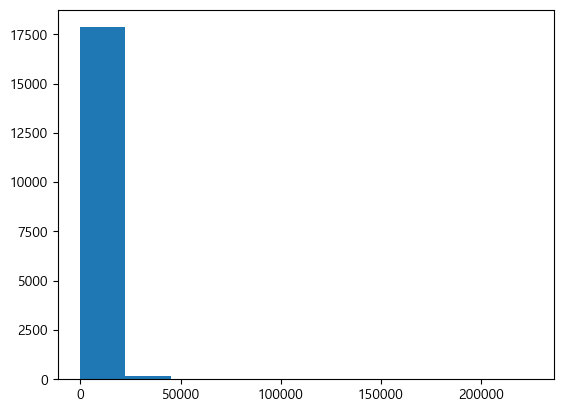

In [34]:
# 변수 income의 histogram 그리기
plt.hist(file2['income'])
plt.show()

# 이 hist의 특징: 오른쪽으로 꼬리가 길다, 돈많이 버는 사람 적지만 있다

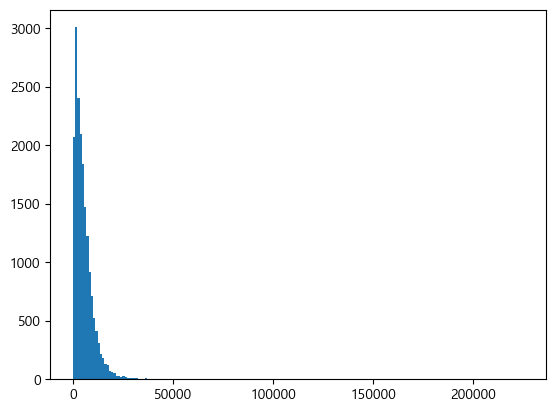

In [32]:
# histogram에 막대기 몇 개 나올지 옵션 정하기 bins=숫자
plt.hist(file2['income'],bins=200)
plt.show()

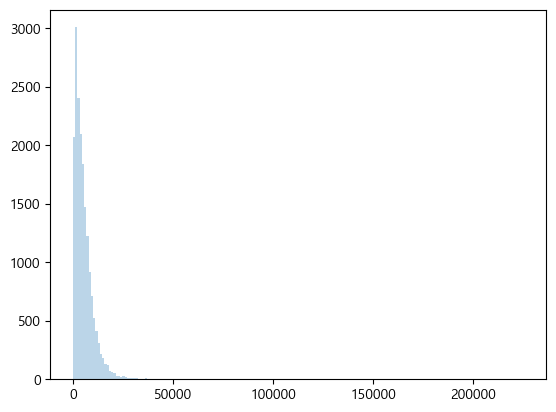

In [33]:
# histogram에 투명도 정하기 alpha=숫자
plt.hist(file2['income'],bins=200, alpha=0.3)
plt.show()

In [36]:
# 사분위수 계산하기
# 1사분위수
file2['income'].quantile(0.25)
# 하위 25%의 소득이 2026만원

2026.0

In [38]:
# 3사분위수
file2['income'].quantile(0.75)
# 상위 25%의 소득이 7331만원

7331.75

In [40]:
# IQR 구하기
IQR=file2['income'].quantile(0.75)-file2['income'].quantile(0.25)
print(IQR)
# IQR <- data의 dispersion을 측정하는 방법
# IQR 클수록 사람들 분포가 펼쳐져 있음 
# = 돈 많이 버는 사람과 적게 버는 사람들의 격차가 크다.

5305.75


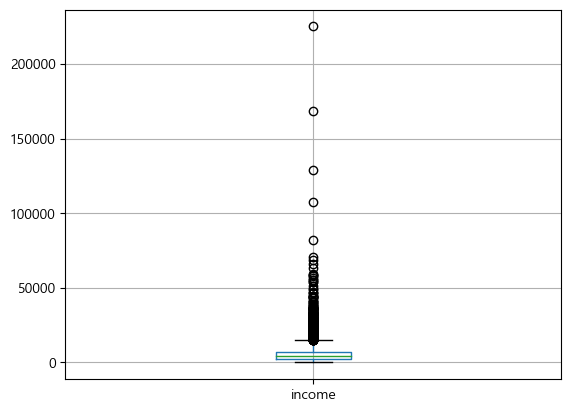

In [41]:
# Boxplot 그리기

file2.boxplot(column=['income'])
plt.show()

## 데이터 형식

> 데이터형식
- list와 tuple은 데이터를 묶어서 저장 / 데이터 형식 달라도 입력 가능

> list: 
- 순서 갖는 임의 데이터 집합
- square bracket으로 표시
- 숫자, 문자 , bool ( True, or False <- logical value) 포함 가능
- 기존 리스트에 새로운 값 추가 가능
- x.append(추가할 값)

> tuple
- 순서 갖는 임의 데이터 집합
- () 로 표시
- 변경, 추가 못함

In [42]:
# list 리스트
x=[10,'big data economics',True]
type(x)

list

In [43]:
print(x[0])

10


In [44]:
print(x[1])

big data economics


In [45]:
print(x[2])

True


In [46]:
x[1]

'big data economics'

In [47]:
x[0]

10

In [48]:
x[0:1]

[10]

In [49]:
x[0:2]

[10, 'big data economics']

In [50]:
x[0:3]

[10, 'big data economics', True]

In [52]:
x[0:4]

[10, 'big data economics', True]

In [53]:
x[-1]

True

In [54]:
# list에 새로운 값 추가하기
x.append(20)
x

[10, 'big data economics', True, 20]

In [55]:
# list 값 변경하기
# x의 0번째 값을 15로 바꾸자
x[0]=15
x

[15, 'big data economics', True, 20]

In [56]:
# tuple
x=(1,'a')
type(x)

tuple

## 반복문 Loop

> for 
- 반드시 indent

> range 이용해서 for 반복문 쓰기

> while 이용해서 for 반복문 쓰기

> list comprehension: for 바놉굼 사용해서 리스트를 효과적으로 생성

In [57]:
# range 이용해서 for 반복문 쓰기

animals=['dog','cat','bird'] #리스트
k=len(animals) # k=3

for i in range(k):
    print(animals[i])

dog
cat
bird


In [58]:
# while 사용해서 loop 반복문 실행하기

i=1
while i<5:
    print(i)
    i=i+1

1
2
3
4


In [59]:
# 0~9까지 숫자를 2를 매번 곱해서 리스트로 생성하자

for i in range(10):
    x=i*2
    print(x)

0
2
4
6
8
10
12
14
16
18


In [60]:
# 반복문 실행 값을 모아서 리스트로 만들기

y=[] #비어있는 리스트 object
for i in range(10):
    x=i*2
    y.append(x)
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [61]:
# list comprehenshion 해보기
# list comprehension: loop 구문을 list 안에서 정의할 수 있는 것

y1=[2*x for x in range(10)]
y1

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## API로 주택실거래가 데이터 수집

- api application programming interface

> 파이썬 코드 이용한 api 호출
- request: , beautifulsoup: html 소스코드를 파이썬 객체로 변환

> 표에 있는 걸 미리 정의 해야 함
- serviceKey, numOfRows, ...
http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade? 구 코드 LAWD_CD=11110& 달 DEAL_YMD=202401&numOfRows=1000&serviceKey=29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D
- numOfRows: 링크 들어가서 보면 밑에 나옴



In [62]:
Servicekey="29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D"
month=202401
gu_code=11110
numOfRows=1000
url="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD="+str(gu_code)+"&DEAL_YMD="+str(month)+"&numOfRows="+str(numOfRows)+"&serviceKey="+Servicekey

In [63]:
print(url)

http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=11110&DEAL_YMD=202401&numOfRows=1000&serviceKey=29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D


In [64]:
# url 불러오기
result=urlopen(url)
house=BeautifulSoup(result,'lxml-xml') #lxml-xml: 데이터를 저장하는 방식 외우셈
house

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      46,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자>24.02.29</등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 명륜1가</법정동><아파트>리치캐슬아파트</아파트><월>1</월><일>4</일><전용면적>64.68</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>33-85</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일

In [65]:
# 위에 걸 같은 변수 끼리 엑셀처럼 묶어 보려면...
# 위에 대충 읽어보면 item으로 시작해서 끝남.. 

te=house.find_all("item")
te

[<item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>      46,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자>24.02.29</등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 명륜1가</법정동><아파트>리치캐슬아파트</아파트><월>1</월><일>4</일><전용면적>64.68</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>33-85</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>      57,400</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자>24.02.05</등

In [66]:
len(te)

17

In [68]:
# 변수 '거래금액' 다 묶기
data=[]
for i in range(len(te)):
    price=te[i].거래금액.string.strip()
    # .string.strip(): 거래금액 19200을 숫자 말고 문자로 가져와라
    apt_name=te[i].아파트.string.strip()
    built_year=te[i].건축년도.string.strip()
    dong_name=te[i].법정동.string.strip()
    size=te[i].전용면적.string.strip()
    gu_code=te[i].지역코드.string.strip()
    
    total=[month,price,apt_name,built_year,dong_name,size,gu_code] 
    # Price랑 apt_name, 등등등의 변수를 묶어서 리스트로 나타내자
    data.append(total)
print(data)

[[202401, '192,000', '경희궁의아침3단지', '2004', '내수동', '149', '11110'], [202401, '192,000', '경희궁의아침3단지', '2004', '내수동', '149', '11110'], [202401, '46,000', '리치캐슬아파트', '2003', '명륜1가', '64.68', '11110'], [202401, '57,400', '송림아마레스아파트', '2003', '명륜1가', '75.62', '11110'], [202401, '57,500', '창신쌍용2', '1993', '창신동', '64.66', '11110'], [202401, '13,500', '삼전솔하임4차', '2014', '숭인동', '15.09', '11110'], [202401, '101,300', '종로청계힐스테이트', '2009', '숭인동', '84.9478', '11110'], [202401, '95,000', '종로센트레빌', '2008', '숭인동', '84.92', '11110'], [202401, '80,000', '종로청계힐스테이트', '2009', '숭인동', '59.9426', '11110'], [202401, '200,000', '경희궁자이(3단지)', '2017', '평동', '84.8359', '11110'], [202401, '195,000', '경희궁자이(2단지)', '2017', '홍파동', '84.8359', '11110'], [202401, '200,000', '경희궁자이(2단지)', '2017', '홍파동', '84.614', '11110'], [202401, '156,000', '경희궁자이(2단지)', '2017', '홍파동', '59.8547', '11110'], [202401, '135,000', '롯데캐슬로잔', '2009', '평창동', '191.725', '11110'], [202401, '70,500', '일성빌라트', '1996', '평창동', '84.99', '11110'], [2024

In [69]:
# 뽑아낸 list data를 pandas 데이터 프레임으로 바꾸기
temp=pd.DataFrame(data,columns=['month','price','apt_name','built_year','dong_name','size','gu_code'])
temp

,month,price,apt_name,built_year,dong_name,size,gu_code
0,202401,"192,000",경희궁의아침3단지,2004,내수동,149,11110
1,202401,"192,000",경희궁의아침3단지,2004,내수동,149,11110
2,202401,"46,000",리치캐슬아파트,2003,명륜1가,64.68,11110
3,202401,"57,400",송림아마레스아파트,2003,명륜1가,75.62,11110
4,202401,"57,500",창신쌍용2,1993,창신동,64.66,11110
5,202401,"13,500",삼전솔하임4차,2014,숭인동,15.09,11110
6,202401,"101,300",종로청계힐스테이트,2009,숭인동,84.9478,11110
7,202401,"95,000",종로센트레빌,2008,숭인동,84.92,11110
8,202401,"80,000",종로청계힐스테이트,2009,숭인동,59.9426,11110
9,202401,"200,000",경희궁자이(3단지),2017,평동,84.8359,11110


In [70]:
# 뽑아낸 list data를 csv로 내보내기
temp.to_csv("c:/temp/house_price100_midetermreview.csv")

# LN3

> 주택실거래가 데이터 분석하기 위해 ..
- 필요한 패키지: pandas
- pandas에서 다루는 데이터 유형: Series, Dataframe

> Series
- array처럼 하나의 칼럼

> DataFrame
- 모두 같은 길이의 data obseravtion 가져야 한다

In [72]:
# 데이터 유형 중 Series 만들어보자
s=pd.Series(np.random.randn(4),name='return')
# 무작위 숫자 4개를 정규분포(randn: 보통 -3에서 3까지 값을 가진다)에서 생성한다
# return이라는 이름으로 저장한다
s

0    0.942763
1   -0.504124
2    1.561092
3    0.092444
Name: return, dtype: float64

In [73]:
type(s)

pandas.core.series.Series

In [74]:
# DataFrame 만들기
# 1 먼저 list 만들고 2 데이터프레임으로 바꾸기

# 먼저 list 생성
data=[[1,2,3],[4,5,6],[7,8,9]]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [75]:
# pandas를 활용해 list를 dataframe으로 변경
df5=pd.DataFrame(data)
df5

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [76]:
# Dataframe의 칼럼 이름 바꾸기
df5=pd.DataFrame(data,columns=['a','b','c'])
df5

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


### 주택실거래가 분석
- csv 파일 다운받은걸 불러와서 해보자
- api 받은걸로? 몰?루

> 데이터프레임 일부분 가져오기
- df.iloc
- df.loc

> .iloc
- 번호로 가져옴
> .loc
- 이름으로 가져옴

In [77]:
df=pd.read_csv("c:/temp/house_price.csv")
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [78]:
# 196rows -> 거래된 수가 196건

In [91]:
# 칼럼 어떤 변수인지 보기
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         196 non-null    int64  
 1   month        196 non-null    int64  
 2   day          196 non-null    int64  
 3   price        196 non-null    int64  
 4   built_yr     196 non-null    int64  
 5   dong_name    196 non-null    object 
 6   apt_name     196 non-null    object 
 7   size         196 non-null    float64
 8   gu_code      196 non-null    int64  
 9   size_pyung   196 non-null    float64
 10  price_pyung  196 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 17.0+ KB


In [80]:
# 칼럼 이름=Index만 쭉 보고싶다
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'price', 'built_yr', 'dong_name',
       'apt_name', 'size', 'gu_code', 'size_pyung', 'price_pyung'],
      dtype='object')

In [84]:
# 칼럼 삭제하기
df11=df.drop('Unnamed: 0',axis=1)
df11

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...
191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [85]:
df11.iloc[2:4]

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994


In [86]:
df11.iloc[1:4]

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994


In [87]:
df11.iloc[2:4,1:3]

,month,day
2,6,2
3,6,2


In [90]:
# loc
df11.loc[df11.index[2:4],['month','day']]

,month,day
2,6,2
3,6,2


In [92]:
# int: 숫자 중 정수, object: 문자, float: 소수점있는 경우

In [93]:
# 새로운 변수 지정해서 칼럼으로 하나 넣기

# 아파트 면적을 평으로 계산해보기
df11['size_p']=df11['size']/3.3 
df11['price_p']=df11['price']/df11['size_p']
df11

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420,24.951515,6011.658975
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465,45.148485,3433.116317
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734,56.200000,5160.142349
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994,51.236364,4098.651526
4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217,25.730303,6801.319044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168,18.087879,8126.989445
192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033,25.700000,6225.680934
193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572
194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572


In [94]:
# data frame 에서 기술통계량
# 문자말고 숫자 변수에 대해서만 나옴
df11.describe()

,year,month,day,price,built_yr,size,gu_code,size_pyung,price_pyung,size_p,price_p
count,196.0,196.0,196.000000,196.000000,196.000000,196.000000,196.0,196.000000,196.000000,196.000000,196.000000
mean,2021.0,6.0,15.301020,201090.770408,2000.775510,96.555573,11650.0,28.995668,7378.031921,29.259265,7311.563165
std,0.0,0.0,7.946371,95597.319324,12.309288,50.931205,0.0,15.294656,3221.817176,15.433699,3192.791796
min,2021.0,6.0,1.000000,19000.000000,1974.000000,18.530000,11650.0,5.564565,2688.707038,5.615152,2664.484452
25%,2021.0,6.0,10.750000,139000.000000,1992.750000,60.087500,11650.0,18.044294,4682.251207,18.208333,4640.068764
50%,2021.0,6.0,15.000000,206875.000000,2003.000000,84.910000,11650.0,25.498498,6889.850555,25.730303,6827.779829
75%,2021.0,6.0,21.000000,270000.000000,2011.000000,115.980000,11650.0,34.828829,9724.376968,35.145455,9636.769968
max,2021.0,6.0,30.000000,510000.000000,2020.000000,244.980000,11650.0,73.567568,15601.412596,74.236364,15460.859329


In [95]:
df11['price'].mean()

201090.77040816325

In [96]:
df11.mean()

year             2021.000000
month               6.000000
day                15.301020
price          201090.770408
built_yr         2000.775510
size               96.555573
gu_code         11650.000000
size_pyung         28.995668
price_pyung      7378.031921
size_p             29.259265
price_p          7311.563165
dtype: float64

In [97]:
# 위에 칼럼 하나 추가한 것을 내보내는데 한글이 깨진다면
df11.to_csv('c:/temp/house_price102_midtermreview.csv',encoding='utf-8-sig')

### 주택실거래가 히스토그램
- matplotlib.pyplot, seaborn 패키지 사용

In [98]:
# 서울시 서초구 2021년 6월에 거래된 아파트 매매 데이터를 불러와서 평당가격에 대한 히스토그램 작성하자

df4=pd.read_csv('c:/temp/house_price1.csv')
df4

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420,24.951515,6011.658975
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465,45.148485,3433.116317
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734,56.200000,5160.142349
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994,51.236364,4098.651526
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217,25.730303,6801.319044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168,18.087879,8126.989445
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033,25.700000,6225.680934
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572


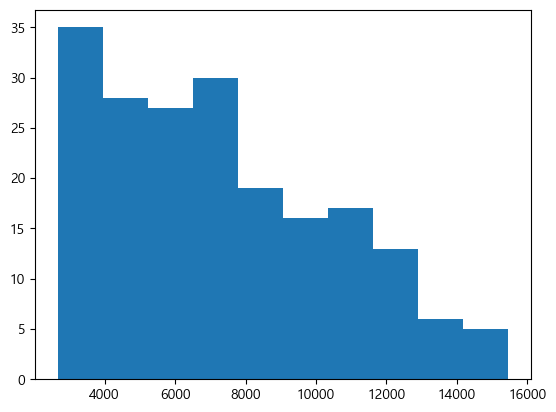

In [99]:
# plt의 hist 함수를 사용하자

plt.hist(df4['price_p'])
plt.show()

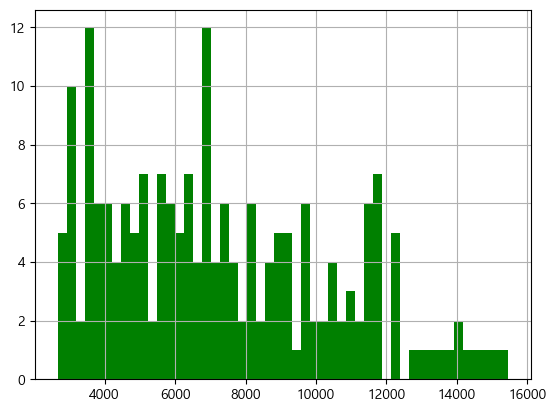

In [101]:
# 더 예쁘게 그리기
plt.hist(df4['price_p'],bins=50, color='g')
plt.grid()
plt.show()

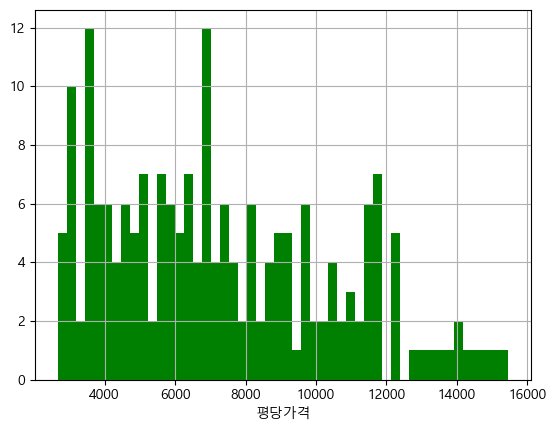

In [102]:
# x축이 평당 가격임.
# 그걸 레이블로 설정하려면

plt.hist(df4['price_p'],bins=50, color='g')
plt.xlabel("평당가격")
plt.grid()
plt.show()


## subplots
- 히스토그램 한번에 여러개 그려서 비교

> 같은 변수를 그냥 히스토그램, 누적 히스토그램으로 비교

> 동별 히스토그램 비교

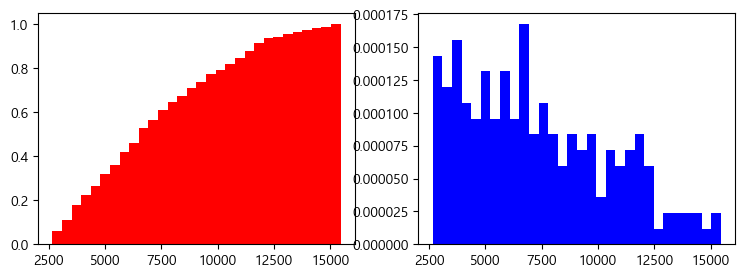

In [103]:
# 히스토그램을 여러개 그려서 하나의 object로 만들기


# (1,2) 가로로 두개 그리겠다. (2.1) 세로로 두개 그리겠다
# fig:전체 그래프의 이름 , axs:subplot 각각의 이름
# set_size: 전체 그래프의 가로 세로 길이 결정

fig,axs=plt.subplots(1,2)
fig.set_size_inches(9,3)

#axs[0]: 첫번째 그래프( 파이쎤은 0부터 시작한다)
#density: , cumulative=True: 누적확률을 계산함 

axs[0].hist(df4['price_p'],bins=30,density=True,color='red',cumulative=True)
axs[1].hist(df4['price_p'],bins=30,density=True,color='blue')
plt.show()

In [104]:
# 동별 히스토그램 비교

# 서초동, 반포동 데이터를 각각 만든다
# iloc 사용하기 어려운 이유; 반포동, 서초동이 몇 번에 있는지 모르니까
# isin 함수: dong_name에 서초동이 포함되 있으면 갖고 와랏

df1=df.loc[df['dong_name'].isin(['서초동'])]
df2=df.loc[df['dong_name'].isin(['반포동'])]
df2

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
108,108,2021,6,7,304000,2009,반포동,반포자이,84.9820,11650,25.520120,11912.169636
109,109,2021,6,11,270000,1974,반포동,에이아이디차관주택,72.5100,11650,21.774775,12399.669011
110,110,2021,6,11,110000,2002,반포동,태평아트,78.6000,11650,23.603604,4660.305344
111,111,2021,6,11,293000,2010,반포동,반포리체,84.9670,11650,25.515616,11483.164052
112,112,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324
113,113,2021,6,11,510000,2016,반포동,아크로리버파크,129.9700,11650,39.030030,13066.861583
114,114,2021,6,11,126900,2002,반포동,타운빌,108.1200,11650,32.468468,3908.407325
115,115,2021,6,11,251000,1974,반포동,에이아이디차관주택,72.5100,11650,21.774775,11527.099710
116,116,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324
117,117,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324


In [105]:
df1

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
138,138,2021,6,1,42500,2014,서초동,강남아르젠,27.640,11650,8.300300,5120.296671
139,139,2021,6,2,155000,2005,서초동,서초트라팰리스,81.760,11650,24.552553,6312.989237
140,140,2021,6,3,42000,2014,서초동,강남아르젠,27.640,11650,8.300300,5060.057887
141,141,2021,6,3,235000,1988,서초동,삼풍아파트,79.470,11650,23.864865,9847.112118
142,142,2021,6,7,31700,2014,서초동,강남아르젠,18.530,11650,5.564565,5696.762008
143,143,2021,6,7,85000,2001,서초동,밀라텔쉐르빌,65.320,11650,19.615616,4333.282303
144,144,2021,6,8,35500,2003,서초동,서초이오빌,43.200,11650,12.972973,2736.458333
145,145,2021,6,9,300000,2004,서초동,아크로비스타,172.280,11650,51.735736,5798.699791
146,146,2021,6,9,29600,2003,서초동,서초이오빌,36.660,11650,11.009009,2688.707038
147,147,2021,6,9,122000,2005,서초동,두산위브(1362),73.080,11650,21.945946,5559.113300


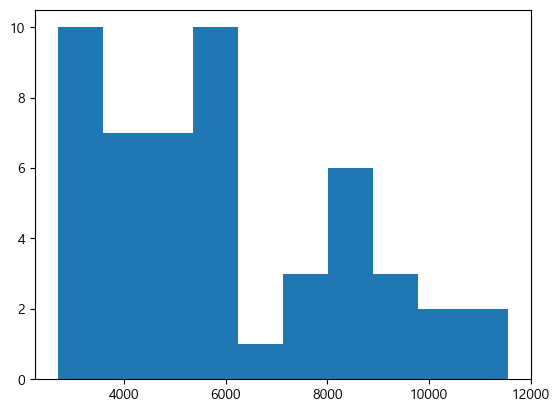

In [107]:
# 서초동 평당 가격 히스토그램
plt.hist(df1['price_pyung']) 
plt.show()

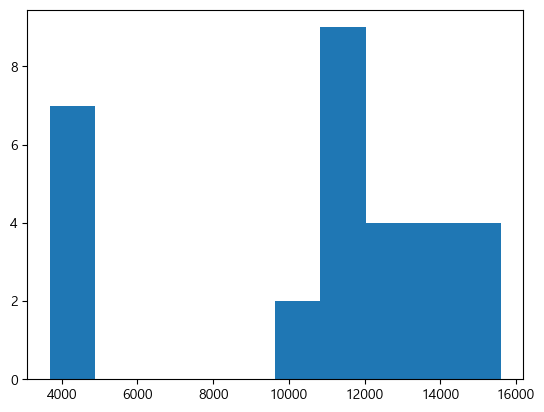

In [108]:
# 반포동 평당 가격 히스토그램
plt.hist(df2['price_pyung']) 
plt.show()

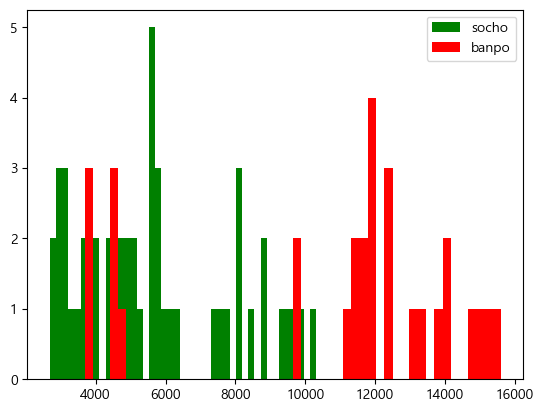

In [109]:
# 서초동, 반포동 히스토그램 겹쳐서 그리기
plt.hist(df1['price_pyung'], bins=50,color='green',label='socho') 
plt.hist(df2['price_pyung'], bins=50, color='red',label='banpo') 
plt.legend() # 위에 지정한 레이블이 나오게 하기 위한 것
plt.show()

### sns로 히스토그램 그리기


<AxesSubplot:xlabel='price_pyung', ylabel='Count'>

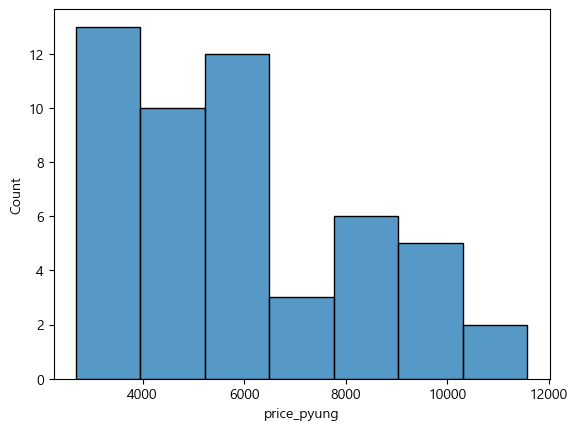

In [111]:
sns.histplot(df1['price_pyung'])

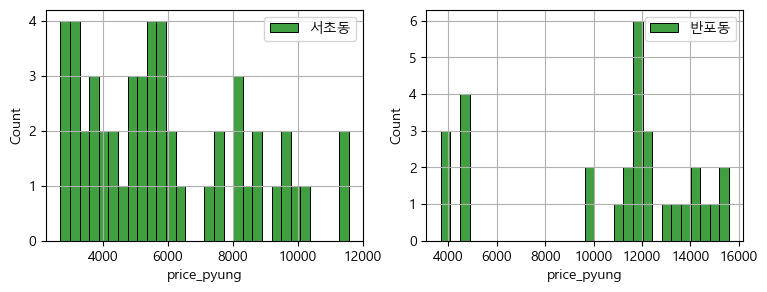

In [112]:
# sns.histplot을 이용해서도 2개 plot(서초동과 반포동) 이어서 그릴 수 있음

fig,axes=plt.subplots(1,2)
fig.set_size_inches(9,3)
x0=df1['price_pyung']
x1=df2['price_pyung']
bins=30

sns.histplot(x0,bins=bins, color='green',label='서초동',ax=axes[0])
sns.histplot(x1,bins=bins, color='green',label='반포동',ax=axes[1])

axes[0].grid()
axes[0].legend()
axes[1].grid()
axes[1].legend()
plt.show()

#### density plot

히스토그램을 자연스러운 곡선으로 연결해 그리는 것
- 함수는 kdeplot
- kernel density plot
- kernel: 히스토그램에 막대기를 자연스럽게 연결한 거
- density 밀도: 항상 0에 가까운 값은 아님. 지금 밑변 단위가 커서 그런것. 필기참고 
- density plot은 확률은 아님
- 확률 구하는데 필요한 값임
- 정규확률분포와 pdf로부터 얻음
- 저 밑에 면적이 확률
- 지금은 밑면이 엄청 커서
- 높이만으로도 확률이 되는 것. 원래 높이는 density임

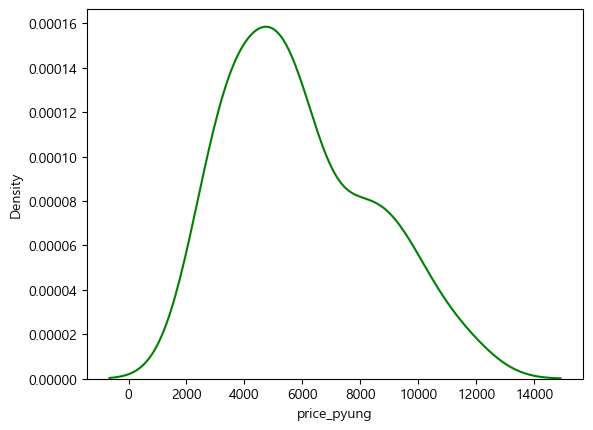

In [113]:
# 서초동의 density plot을 그리고자 한다
sns.kdeplot(df1['price_pyung'],color='green',label='socho')
plt.show()

In [114]:
# 피크= 한 5000쯤에서 많이 거래됬구나, 높은 가격대도 조금씩 존재하는 구나
# 분포, 최대 최소 이런거 보는거에 도움이됨

# x축: 가격
# y축: density

<AxesSubplot:xlabel='price_pyung', ylabel='Density'>

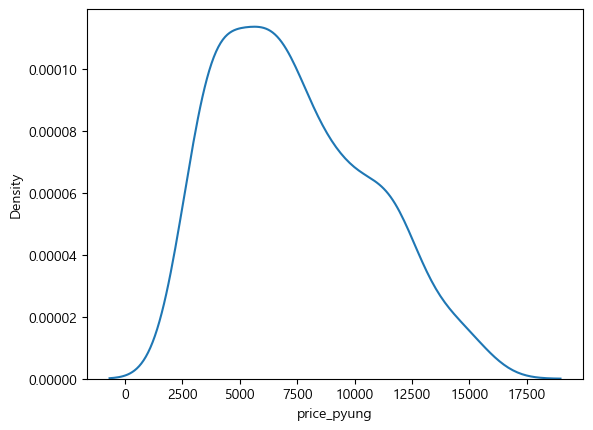

In [116]:
# 평당 아파트 가격에 대한 동별 히스토그램 그려보자
# 겹쳐서 그려보자. 그러면 동별 비교가 가능하다

# 서초구 8개 동의 kdeplot을 동시에 겹치게 그린다. 서로 비교를 위해서

sns.kdeplot(data=df,x='price_pyung')
# 이건 서초구 전체의 가격 분포

<AxesSubplot:xlabel='price_pyung', ylabel='Density'>

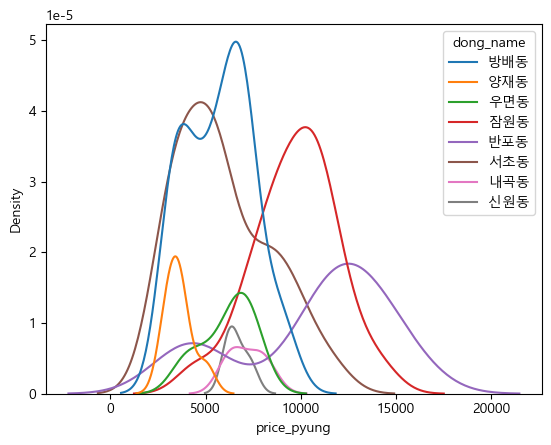

In [118]:
# hue 옵션사용해서 각각 동 그리고 겹쳐보자
sns.kdeplot(data=df,x='price_pyung',hue='dong_name')

In [120]:
# 반포동에 비싼 집 몰려있구나
# 상대적으로는 양재동이 싸구나

# 반포동과 양재동 차이 큼: 분산이 다름. 
#양재동은 거의 3000에서 다 몰려 있고, 반포는 분산이 큼


<AxesSubplot:>

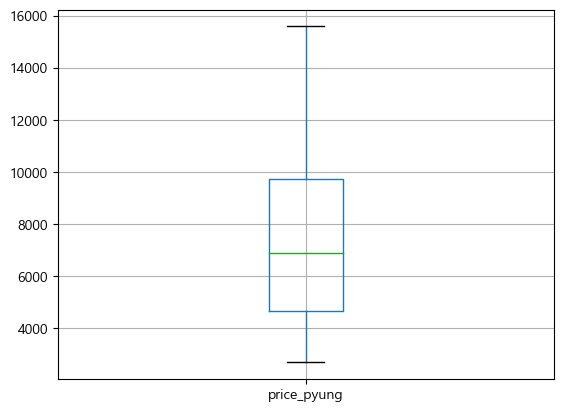

In [121]:
# price_p(아파트평당가격)의 분포 살펴보고 있다.

# box plot
df.boxplot(column='price_pyung')

<AxesSubplot:title={'center':'price_pyung'}, xlabel='dong_name'>

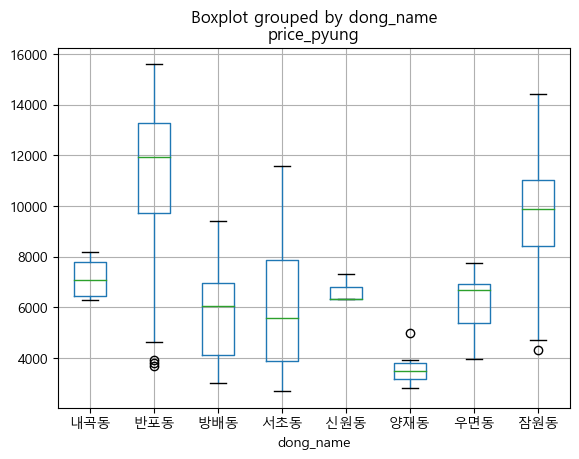

In [123]:
# 동별로 그리겠다
df.boxplot(column='price_pyung',by='dong_name')

<AxesSubplot:ylabel='price_pyung'>

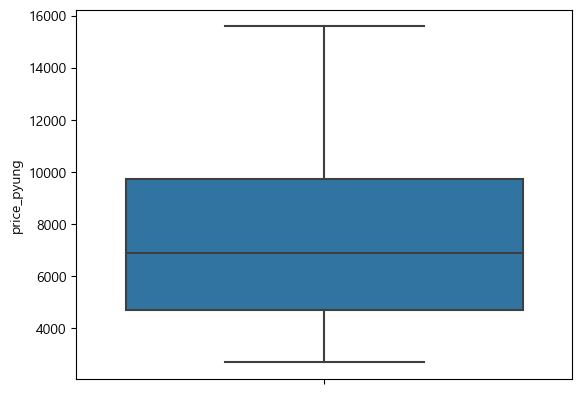

In [125]:
# sns 에서 boxplot 그려보기

# 서초구 전체 boxplot
sns.boxplot(data=df, y='price_pyung')

<AxesSubplot:xlabel='dong_name', ylabel='price_pyung'>

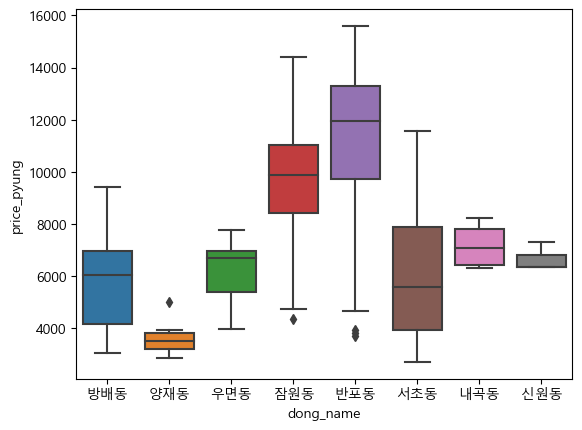

In [126]:
sns.boxplot(data=df, y='price_pyung', x='dong_name')
# 서초구 동별 boxplot
# y축에 가격적는거임!! 주의!!

In [127]:
# 동대문구 2023년 12월 아파트, 전월세 거래 데이터
# dongdaemungu_202312.csv

df=pd.read_csv("c:/temp/dongdaemungu_202312.csv")
df

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code
0,0,202312,"1,000",80,2018,신설동,포레스트힐시티,14.750,11230
1,1,202312,"1,000",77,2017,신설동,신설동지웰홈스,19.700,11230
2,2,202312,"1,000",70,2017,신설동,신설동지웰홈스,13.750,11230
3,3,202312,"16,200",10,2018,신설동,포레스트힐시티,15.250,11230
4,4,202312,"3,000",56,2018,신설동,포레스트힐시티,15.210,11230
...,...,...,...,...,...,...,...,...,...
670,670,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
671,671,202312,"5,000",100,2000,이문동,쌍용,59.990,11230
672,672,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
673,673,202312,"54,000",0,2001,이문동,이문삼성래미안아파트,149.934,11230


In [128]:
# 전세-월세 전환 공식: 전환된 전세금*0.05/12=월세,  전세금=월세*12/이자율   전월세 전환율 =0.049 
df['deposit1']=df['m_rent']*12/0.049 
df

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1
0,0,202312,"1,000",80,2018,신설동,포레스트힐시티,14.750,11230,19591.836735
1,1,202312,"1,000",77,2017,신설동,신설동지웰홈스,19.700,11230,18857.142857
2,2,202312,"1,000",70,2017,신설동,신설동지웰홈스,13.750,11230,17142.857143
3,3,202312,"16,200",10,2018,신설동,포레스트힐시티,15.250,11230,2448.979592
4,4,202312,"3,000",56,2018,신설동,포레스트힐시티,15.210,11230,13714.285714
...,...,...,...,...,...,...,...,...,...,...
670,670,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000
671,671,202312,"5,000",100,2000,이문동,쌍용,59.990,11230,24489.795918
672,672,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000
673,673,202312,"54,000",0,2001,이문동,이문삼성래미안아파트,149.934,11230,0.000000


In [133]:
# 먼저 deposit을 숫자로 변환하자. 이런 코드는 외워놓자
df['deposit']=df['deposit'].str.replace(",","").astype(int)
df['deposit_new']=df['deposit']+df['deposit1']
df

AttributeError: Can only use .str accessor with string values!

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   675 non-null    int64  
 1   monoth       675 non-null    int64  
 2   deposit      675 non-null    int32  
 3   m_rent       675 non-null    int64  
 4   built_yr     675 non-null    int64  
 5   dong_name    675 non-null    object 
 6   apt_name     675 non-null    object 
 7   size         675 non-null    float64
 8   gu_code      675 non-null    int64  
 9   deposit1     675 non-null    float64
 10  deposit_new  675 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 55.5+ KB


In [136]:
# 0번 : 1000/80은 전세 1억9천5백+천만원=2억5백 정도 하는것

# 전세금 다시 정의 = deposit1+보증금
# 근데 deposit을 문자로 이해하고 있음 .콤마가 있어서
df['deposit_new']=df['deposit']+df['deposit1']
df

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1,deposit_new
0,0,202312,1000,80,2018,신설동,포레스트힐시티,14.750,11230,19591.836735,20591.836735
1,1,202312,1000,77,2017,신설동,신설동지웰홈스,19.700,11230,18857.142857,19857.142857
2,2,202312,1000,70,2017,신설동,신설동지웰홈스,13.750,11230,17142.857143,18142.857143
3,3,202312,16200,10,2018,신설동,포레스트힐시티,15.250,11230,2448.979592,18648.979592
4,4,202312,3000,56,2018,신설동,포레스트힐시티,15.210,11230,13714.285714,16714.285714
...,...,...,...,...,...,...,...,...,...,...,...
670,670,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000,37000.000000
671,671,202312,5000,100,2000,이문동,쌍용,59.990,11230,24489.795918,29489.795918
672,672,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000,37000.000000
673,673,202312,54000,0,2001,이문동,이문삼성래미안아파트,149.934,11230,0.000000,54000.000000


In [137]:
# deposit_new를 바로 비교하면 안됨
# 평당 전세가로 바꿔서 비교해야함

# 알아서 해보세요

# 평당 전세가(보증금) 구하기
df['size_p']=df['size']/3.3 
df['deposit_p']=df['deposit_new']/df['size_p']
df

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1,deposit_new,size_p,deposit_p
0,0,202312,1000,80,2018,신설동,포레스트힐시티,14.750,11230,19591.836735,20591.836735,4.469697,4606.987202
1,1,202312,1000,77,2017,신설동,신설동지웰홈스,19.700,11230,18857.142857,19857.142857,5.969697,3326.323423
2,2,202312,1000,70,2017,신설동,신설동지웰홈스,13.750,11230,17142.857143,18142.857143,4.166667,4354.285714
3,3,202312,16200,10,2018,신설동,포레스트힐시티,15.250,11230,2448.979592,18648.979592,4.621212,4035.516895
4,4,202312,3000,56,2018,신설동,포레스트힐시티,15.210,11230,13714.285714,16714.285714,4.609091,3626.373626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000,37000.000000,18.000000,2055.555556
671,671,202312,5000,100,2000,이문동,쌍용,59.990,11230,24489.795918,29489.795918,18.178788,1622.209144
672,672,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.000000,37000.000000,18.000000,2055.555556
673,673,202312,54000,0,2001,이문동,이문삼성래미안아파트,149.934,11230,0.000000,54000.000000,45.434545,1188.522950
